In [38]:
import os
import tensorflow as tf
os.environ['TFHUB_MODEL_LOAD_FORMAT'] = 'COMPRESSED'

In [39]:
import matplotlib.pyplot as plt
import numpy as np
import PIL.Image

In [40]:
def tensor_to_image(tensor_1):
  tensor_1 = tensor_1*255
  tensor_1 = np.array(tensor_1, dtype=np.uint8)
  a = np.ndim(tensor_1)
  if a>3:
    assert tensor_1.shape[0] == 1
    tensor = tensor_1[0]
  x = PIL.Image.fromarray(tensor)
  return x

In [99]:
def load_img(path_to_img):
  max_dim = 512
  img = tf.io.read_file(path_to_img)
  img = tf.image.decode_image(img, channels=3)
  img = tf.image.convert_image_dtype(img, tf.float32)

  img = tf.image.resize(img, (300,400))
  img = img[tf.newaxis, :]
  return img

In [100]:
def imshow(image, title=None):
  if len(image.shape) > 3:
    image = tf.squeeze(image, axis=0)

  plt.imshow(image)
  if title:
    plt.title(title)

In [114]:
import tensorflow_hub as hub
from PIL import Image 
hub_model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


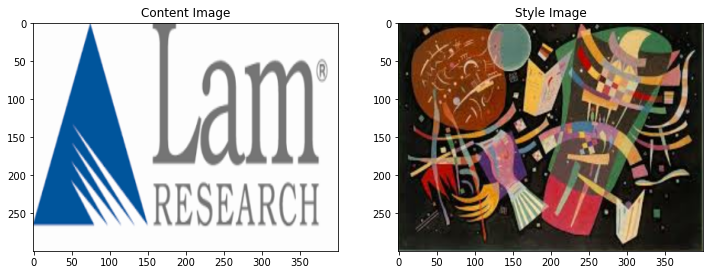

In [117]:

for i in range(1,21):

  content_image = load_img('drive/MyDrive/logos/logo_'+str(i)+'.png')
  style_image = load_img('drive/MyDrive/arts/art_'+str(i)+'.jpg')

  plt.subplot(1, 2, 1)
  imshow(content_image, 'Content Image')

  plt.subplot(1, 2, 2)
  imshow(style_image, 'Style Image')

  stylized_image = hub_model(tf.constant(content_image), tf.constant(style_image))[0]
  image = tensor_to_image(stylized_image)
  image.save('drive/MyDrive/logo_arts/logo_art_'+str(i)+'.jpg')

In [102]:
hub_model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')